In [1]:
import tensorflow as tf
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
import random
tf.set_random_seed(777)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.examples.tutorials.mnist import input_data

#import input_data

In [2]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [5]:
mnist = input_data.read_data_sets("MNIST_data1/", one_hot=True)

Extracting MNIST_data1/train-images-idx3-ubyte.gz
Extracting MNIST_data1/train-labels-idx1-ubyte.gz
Extracting MNIST_data1/t10k-images-idx3-ubyte.gz
Extracting MNIST_data1/t10k-labels-idx1-ubyte.gz


In [6]:

#from tensorflow.examples.tutorials.mnist import input_data
##check out https://www.tensorflow.org/get_started/mnist/beginners
#for more information about the mnist dataset
#import input_data
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes = 10

#MNISR data image of shape 28*28 = 784 (픽셀의 수)
X = tf.placeholder(tf.float32,[None,784])
#0-9 digits recognition = 10 classes (명암) 
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784,nb_classes]),name = "weight")
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

#Test model
is_correct = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
#Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

#parameters
training_epochs = 50 
batch_size = 100 
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    #Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    #Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        #total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) ##(100)
            cost_val, _ = sess.run([cost, optimizer],feed_dict = {X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations
            
        print("Epoch:","%04d" % (epoch+1), "cost =","{:.9f}".format(avg_cost)) 
    
    print("Learning finished")
    
    print("Accuracy: {:.2%}".format(accuracy.eval(session = sess, feed_dict = {X:mnist.test.images, Y:mnist.test.labels})))
    # max might be 92-93%

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch: 0001 cost = 2.963037685
Epoch: 0002 cost = 1.129202711
Epoch: 0003 cost = 0.894858653
Epoch: 0004 cost = 0.783576849
Epoch: 0005 cost = 0.715411800
Epoch: 0006 cost = 0.666772923
Epoch: 0007 cost = 0.630380423
Epoch: 0008 cost = 0.601543197
Epoch: 0009 cost = 0.576894562
Epoch: 0010 cost = 0.556442581
Epoch: 0011 cost = 0.538777577
Epoch: 0012 cost = 0.523121409
Epoch: 0013 cost = 0.509377058
Epoch: 0014 cost = 0.497066811
Epoch: 0015 cost = 0.485581852
Epoch: 0016 cost = 0.475711222
Epoch: 0017 cost = 0.466324526
Epoch: 0018 cost = 0.457314834
Epoch: 0019 cost = 0.449741222
Epoch: 0020 cost = 0.442506803
Epoch: 0021 cost = 0.435426104
Epoch: 0022 cost = 0.429534475
Epoch: 0023 cost = 0.423005697
Epoch: 0024 cost = 0.417537704
Epoch: 0025 cost = 0.412061254
Epoch: 0026 cost = 0.407390338
Epoch: 0027 cost = 0.402530561
Epoch: 0028 cost = 0.397682834
Epoch: 0029 

Extracting MNIST_data1/train-images-idx3-ubyte.gz
Extracting MNIST_data1/train-labels-idx1-ubyte.gz
Extracting MNIST_data1/t10k-images-idx3-ubyte.gz
Extracting MNIST_data1/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.818829086
Epoch: 0002, Cost: 1.085257461
Epoch: 0003, Cost: 0.864798773
Epoch: 0004, Cost: 0.755770942
Epoch: 0005, Cost: 0.686584525
Epoch: 0006, Cost: 0.637953215
Epoch: 0007, Cost: 0.600986027
Epoch: 0008, Cost: 0.571490138
Epoch: 0009, Cost: 0.547181059
Epoch: 0010, Cost: 0.527145616
Epoch: 0011, Cost: 0.510084287
Epoch: 0012, Cost: 0.494643597
Epoch: 0013, Cost: 0.481214445
Epoch: 0014, Cost: 0.469831746
Epoch: 0015, Cost: 0.458875791
Learning finished
Accuracy:  0.892
Label:  [8]
Prediction:  [8]


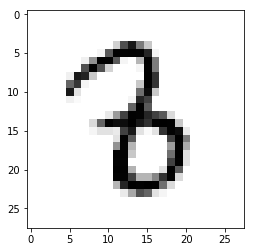

Label:  [6]
Prediction:  [6]


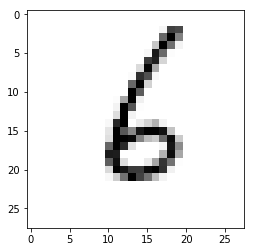

In [7]:
import tensorflow as tf
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
import random
tf.set_random_seed(777)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data1/", one_hot=True)

import random
import matplotlib.pyplot as plt
nb_classes = 10 
 
 
 # MNIST data image of shape 28 * 28 = 784 
X = tf.placeholder(tf.float32, [None, 784]) 
 # 0 - 9 digits recognition = 10 classes 
Y = tf.placeholder(tf.float32, [None, nb_classes]) 
 
W = tf.Variable(tf.random_normal([784, nb_classes])) 
b = tf.Variable(tf.random_normal([nb_classes])) 

 
# Hypothesis (using softmax) 
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b) 

 
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) 

 
# Test model 
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) 
 # Calculate accuracy 
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 

 
# parameters 
num_epochs = 15 
batch_size = 100 
num_iterations = int(mnist.train.num_examples / batch_size) 

 
with tf.Session() as sess: 
    # Initialize TensorFlow variables 
    sess.run(tf.global_variables_initializer()) 
    # Training cycle 
    for epoch in range(num_epochs): 
        avg_cost = 0 

 
        for i in range(num_iterations): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys}) 
            avg_cost += cost_val / num_iterations 

 
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost)) 

 
    print("Learning finished") 

 
    # Test the model using test sets 
    print( 
        "Accuracy: ", 
        accuracy.eval( 
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels} 
        ), 
    ) 

 
    for i in range(2):
        # Get one and predict 
        r = random.randint(0, mnist.test.num_examples - 1) 
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1))) 
        print( 
            "Prediction: ", 
            sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}), 
        ) 

 
        plt.imshow( 
            mnist.test.images[r : r + 1].reshape(28, 28), 
            cmap="Greys", 
            interpolation="nearest", 
        ) 
        plt.show() 
        
#W = tf.Variable(tf.random_normal([784, nb_classes])) 
#b = tf.Variable(tf.random_normal([nb_classes])) 
    w1 = sess.run(W)
    b1 = sess.run(b)

Epoch: 0001, Cost: 0.449458212
Epoch: 0002, Cost: 0.441382796
Epoch: 0003, Cost: 0.433171750
Epoch: 0004, Cost: 0.426198456
Epoch: 0005, Cost: 0.419485721
Epoch: 0006, Cost: 0.413063930
Epoch: 0007, Cost: 0.407621407
Epoch: 0008, Cost: 0.402141440
Epoch: 0009, Cost: 0.396709323
Epoch: 0010, Cost: 0.392051935
Epoch: 0011, Cost: 0.387775646
Epoch: 0012, Cost: 0.383594054
Epoch: 0013, Cost: 0.379419344
Epoch: 0014, Cost: 0.375396776
Epoch: 0015, Cost: 0.372197017
Learning finished
Accuracy:  0.9049
Label:  [3]
Prediction:  [3]


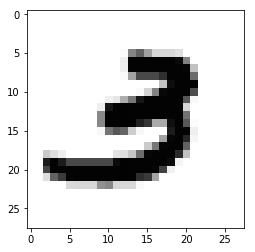

Label:  [3]
Prediction:  [3]


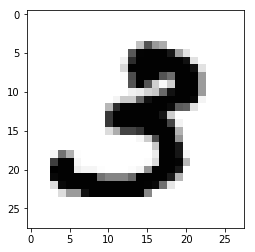

In [8]:
import random
import matplotlib.pyplot as plt
nb_classes = 10 
 
 
 # MNIST data image of shape 28 * 28 = 784 
X = tf.placeholder(tf.float32, [None, 784]) 
 # 0 - 9 digits recognition = 10 classes 
Y = tf.placeholder(tf.float32, [None, nb_classes]) 
 
W1 = tf.Variable(w1)  ##w1 = sess.run(W)
b1 = tf.Variable(b1)  ##b1 = sess.run(b)  (above code)
# cost value starts at 0.4
 
# Hypothesis (using softmax) 
hypothesis = tf.nn.softmax(tf.matmul(X, W1) + b1) 

 
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) 

 
# Test model 
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) 
 # Calculate accuracy 
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 

 
# parameters 
num_epochs = 15 
batch_size = 100 
num_iterations = int(mnist.train.num_examples / batch_size) 

 
with tf.Session() as sess: 
    # Initialize TensorFlow variables 
    sess.run(tf.global_variables_initializer()) 
    # Training cycle 
    for epoch in range(num_epochs): 
        avg_cost = 0 

 
        for i in range(num_iterations): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys}) 
            avg_cost += cost_val / num_iterations 

 
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost)) 

 
    print("Learning finished") 

 
    # Test the model using test sets 
    print( 
        "Accuracy: ", 
        accuracy.eval( 
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels} 
        ), 
    ) 

 
    for i in range(2):
        # Get one and predict 
        r = random.randint(0, mnist.test.num_examples - 1) 
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1))) 
        print( 
            "Prediction: ", 
            sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}), 
        ) 

 
        plt.imshow( 
            mnist.test.images[r : r + 1].reshape(28, 28), 
            cmap="Greys", 
            interpolation="nearest", 
        ) 
        plt.show() 
        
        #save again
    W2 = sess.run(W1)
    b2 = sess.run(b1)

Epoch: 0001, Cost: 0.368657755
Epoch: 0002, Cost: 0.365397841
Epoch: 0003, Cost: 0.362073176
Epoch: 0004, Cost: 0.359214230
Epoch: 0005, Cost: 0.356533951
Epoch: 0006, Cost: 0.353747149
Epoch: 0007, Cost: 0.351162786
Epoch: 0008, Cost: 0.348794800
Epoch: 0009, Cost: 0.345864345
Epoch: 0010, Cost: 0.343771006
Epoch: 0011, Cost: 0.341535818
Epoch: 0012, Cost: 0.339390268
Epoch: 0013, Cost: 0.337265276
Epoch: 0014, Cost: 0.335304707
Epoch: 0015, Cost: 0.333256263
Learning finished
Accuracy:  0.9101
Label:  [0]
Prediction:  [0]


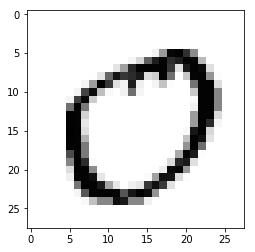

Label:  [7]
Prediction:  [7]


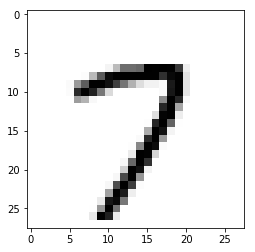

In [9]:
import random
import matplotlib.pyplot as plt
nb_classes = 10 
 
 
 # MNIST data image of shape 28 * 28 = 784 
X = tf.placeholder(tf.float32, [None, 784]) 
 # 0 - 9 digits recognition = 10 classes 
Y = tf.placeholder(tf.float32, [None, nb_classes]) 
 
W3 = tf.Variable(W2)  ##w2 = sess.run(W)
b3 = tf.Variable(b2)  ##b2 = sess.run(b) 

 
# Hypothesis (using softmax) 
hypothesis = tf.nn.softmax(tf.matmul(X, W3) + b3) 

 
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) 


# Test model 
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) 
 # Calculate accuracy 
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 

 
# parameters 
num_epochs = 15 
batch_size = 100 
num_iterations = int(mnist.train.num_examples / batch_size) 

 
with tf.Session() as sess: 
    # Initialize TensorFlow variables 
    sess.run(tf.global_variables_initializer()) 
    # Training cycle 
    for epoch in range(num_epochs): 
        avg_cost = 0 

 
        for i in range(num_iterations): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys}) 
            avg_cost += cost_val / num_iterations 

 
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost)) 

 
    print("Learning finished") 

 
    # Test the model using test sets 
    print( 
        "Accuracy: ", 
        accuracy.eval( 
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels} 
        ), 
    ) 

 
    for i in range(2):
        # Get one and predict 
        r = random.randint(0, mnist.test.num_examples - 1) 
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1))) 
        print( 
            "Prediction: ", 
            sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}), 
        ) 

 
        plt.imshow( 
            mnist.test.images[r : r + 1].reshape(28, 28), 
            cmap="Greys", 
            interpolation="nearest", 
        ) 
        plt.show() 
        #save again
    W4 = sess.run(W3)
    b4 = sess.run(b3)

Epoch: 0001, Cost: 0.331430499
Epoch: 0002, Cost: 0.329733486
Epoch: 0003, Cost: 0.328065168
Epoch: 0004, Cost: 0.326323758
Epoch: 0005, Cost: 0.324703791
Epoch: 0006, Cost: 0.323000247
Epoch: 0007, Cost: 0.321469588
Epoch: 0008, Cost: 0.320114389
Epoch: 0009, Cost: 0.318452323
Epoch: 0010, Cost: 0.317014082
Epoch: 0011, Cost: 0.315451965
Epoch: 0012, Cost: 0.314444068
Epoch: 0013, Cost: 0.313086814
Epoch: 0014, Cost: 0.311703834
Epoch: 0015, Cost: 0.310358652
Learning finished
Accuracy:  0.9148
Label:  [8]
Prediction:  [8]


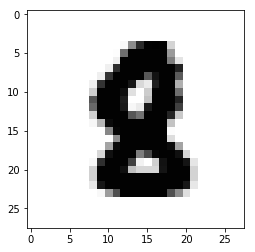

Label:  [2]
Prediction:  [2]


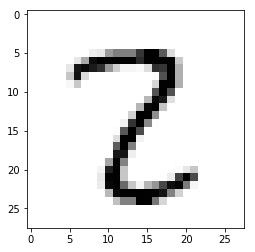

In [10]:
import random
import matplotlib.pyplot as plt
nb_classes = 10 
 
 
 # MNIST data image of shape 28 * 28 = 784 
X = tf.placeholder(tf.float32, [None, 784]) 
 # 0 - 9 digits recognition = 10 classes 
Y = tf.placeholder(tf.float32, [None, nb_classes]) 
 
W5 = tf.Variable(W4)  ##w2 = sess.run(W)
b5 = tf.Variable(b4)  ##b2 = sess.run(b) 

 
# Hypothesis (using softmax) 
hypothesis = tf.nn.softmax(tf.matmul(X, W5) + b5) 

 
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) 


# Test model 
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) 
 # Calculate accuracy 
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 

 
# parameters 
num_epochs = 15 
batch_size = 100 
num_iterations = int(mnist.train.num_examples / batch_size) 

 
with tf.Session() as sess: 
    # Initialize TensorFlow variables 
    sess.run(tf.global_variables_initializer()) 
    # Training cycle 
    for epoch in range(num_epochs): 
        avg_cost = 0 

 
        for i in range(num_iterations): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys}) 
            avg_cost += cost_val / num_iterations 

 
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost)) 

 
    print("Learning finished") 

 
    # Test the model using test sets 
    print( 
        "Accuracy: ", 
        accuracy.eval( 
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels} 
        ), 
    ) 

 
    for i in range(2):
        # Get one and predict 
        r = random.randint(0, mnist.test.num_examples - 1) 
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1))) 
        print( 
            "Prediction: ", 
            sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}), 
        ) 

 
        plt.imshow( 
            mnist.test.images[r : r + 1].reshape(28, 28), 
            cmap="Greys", 
            interpolation="nearest", 
        ) 
        plt.show() 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data1/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data1/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data1/t10k-images-idx3-ubyte.gz
Extracting MNIST_data1/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch: 0001, Cost: 2.826302753
Epoch: 0002, Cost: 1.061668979
Epoch: 0003, Cost: 0.838061320
Epoch: 0004, Cost: 0.733232744
Epoch: 0005, Cost: 0.669279890
Epoch: 0006, Cost: 0.6

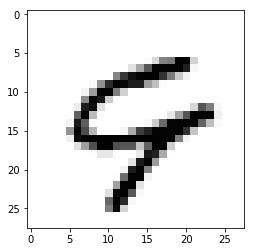

Label:  [6]
Prediction:  [6]


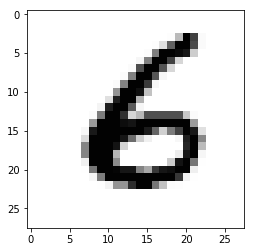

In [1]:
 import tensorflow as tf
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
import random
tf.set_random_seed(777)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data1/", one_hot=True)

import random
import matplotlib.pyplot as plt
nb_classes = 10 
 
 
 # MNIST data image of shape 28 * 28 = 784 
X = tf.placeholder(tf.float32, [None, 784]) 
 # 0 - 9 digits recognition = 10 classes 
Y = tf.placeholder(tf.float32, [None, nb_classes]) 
 
W = tf.Variable(tf.random_normal([784, nb_classes])) 
b = tf.Variable(tf.random_normal([nb_classes])) 

 
# Hypothesis (using softmax) 
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b) 

 
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) 

 
# Test model 
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) 
 # Calculate accuracy 
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 

 
# parameters 
num_epochs = 15 
batch_size = 100 
num_iterations = int(mnist.train.num_examples / batch_size) 

 
with tf.Session() as sess: 
    # Initialize TensorFlow variables 
    sess.run(tf.global_variables_initializer()) 
    # Training cycle 
    for epoch in range(num_epochs): 
        avg_cost = 0 

 
        for i in range(num_iterations): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys}) 
            avg_cost += cost_val / num_iterations 

 
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost)) 

 
    print("Learning finished") 

 
    # Test the model using test sets 
    print( 
        "Accuracy: ", 
        accuracy.eval( 
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels} 
        ), 
    ) 

 
    for i in range(2):
        # Get one and predict 
        r = random.randint(0, mnist.test.num_examples - 1) 
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1))) 
        print( 
            "Prediction: ", 
            sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}), 
        ) 

 
        plt.imshow( 
            mnist.test.images[r : r + 1].reshape(28, 28), 
            cmap="Greys", 
            interpolation="nearest", 
        ) 
        plt.show() 
        
#W = tf.Variable(tf.random_normal([784, nb_classes])) 
#b = tf.Variable(tf.random_normal([nb_classes])) 
    w1 = sess.run(W)
    b1 = sess.run(b)

Extracting MNIST_data1/train-images-idx3-ubyte.gz
Extracting MNIST_data1/train-labels-idx1-ubyte.gz
Extracting MNIST_data1/t10k-images-idx3-ubyte.gz
Extracting MNIST_data1/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.829796250
Epoch: 0002, Cost: 1.164587781
Epoch: 0003, Cost: 0.916493520
Epoch: 0004, Cost: 0.792157127
Epoch: 0005, Cost: 0.713875212
Epoch: 0006, Cost: 0.659547904
Epoch: 0007, Cost: 0.619372041
Epoch: 0008, Cost: 0.587554339
Epoch: 0009, Cost: 0.561924190
Epoch: 0010, Cost: 0.540381344
Epoch: 0011, Cost: 0.522066483
Epoch: 0012, Cost: 0.506388035
Epoch: 0013, Cost: 0.492578848
Epoch: 0014, Cost: 0.480623357
Epoch: 0015, Cost: 0.469310464
Learning finished
Accuracy:  0.887
Label:  [9]
Prediction:  [9]


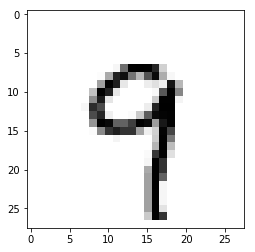

Label:  [6]
Prediction:  [5]


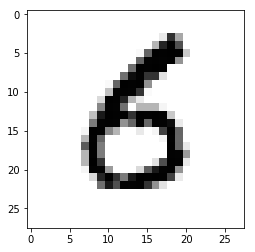

In [9]:
#W,b값 이어서 쓸수있나 실험 해보기
import tensorflow as tf
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
import random
tf.set_random_seed(777)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data1/", one_hot=True)

import random
import matplotlib.pyplot as plt
nb_classes = 10 
 
 
 # MNIST data image of shape 28 * 28 = 784 
X = tf.placeholder(tf.float32, [None, 784]) 
 # 0 - 9 digits recognition = 10 classes 
Y = tf.placeholder(tf.float32, [None, nb_classes]) 
 
W = tf.Variable(tf.random_normal([784, nb_classes])) 
b = tf.Variable(tf.random_normal([nb_classes])) 

 
# Hypothesis (using softmax) 
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b) 

 
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) 

 
# Test model 
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) 
 # Calculate accuracy 
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 

 
# parameters 
num_epochs = 15 
batch_size = 100 
num_iterations = int(mnist.train.num_examples / batch_size) 

 
with tf.Session() as sess: 
    # Initialize TensorFlow variables 
    sess.run(tf.global_variables_initializer()) 
    # Training cycle 
    for epoch in range(num_epochs): 
        avg_cost = 0 

 
        for i in range(num_iterations): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys}) 
            avg_cost += cost_val / num_iterations 

 
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost)) 

 
    print("Learning finished") 

 
    # Test the model using test sets 
    print( 
        "Accuracy: ", 
        accuracy.eval( 
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels} 
        ), 
    ) 

 
    for i in range(2):
        # Get one and predict 
        r = random.randint(0, mnist.test.num_examples - 1) 
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1))) 
        print( 
            "Prediction: ", 
            sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}), 
        ) 

 
        plt.imshow( 
            mnist.test.images[r : r + 1].reshape(28, 28), 
            cmap="Greys", 
            interpolation="nearest", 
        ) 
        plt.show() 
        
#W = tf.Variable(tf.random_normal([784, nb_classes])) 
#b = tf.Variable(tf.random_normal([nb_classes])) 
